
## 作業

目標: 建立一深度學習模型預測客戶是否流失

- 問題一: 請將資料區分為訓練與測試資料集
- 問題二: 請將資料標準化
- 問題三: 使用Keras 建立深度學習模型預測客戶是否流失
- 問題四: 評估模型準確度
- 問題五: 請繪製ROC Curve, 並求出 AUC
- 問題六: 請比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

### 讀取資料

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv', header = 0 )
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 資料預處理

In [7]:
df = df.iloc[:,3:]

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
import pandas
geography = pandas.get_dummies(df['Geography'])
del geography['France']

In [12]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
import pandas
gender = pandas.get_dummies(df['Gender'])
del gender['Male']

In [16]:
#geography

In [18]:
df = pandas.concat([geography, gender, df], axis = 1)

In [19]:
df.head()

,Germany,Spain,Female,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,0,1,1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,0,0,1,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,0,0,1,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,0,1,1,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
del df['Gender']
del df['Geography']

In [21]:
df.head()

,Germany,Spain,Female,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,1,619,42,2,0.00,1,1,1,101348.88,1
1,0,1,1,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,1,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,1,699,39,1,0.00,2,0,0,93826.63,0
4,0,1,1,850,43,2,125510.82,1,1,1,79084.10,0


### 將資料區分為訓練與測試資料集

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [24]:
train_x.shape

(7000, 11)

In [25]:
test_x.shape

(3000, 11)

### 將資料標準化

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)

In [28]:
train_x

array([[-0.57559072,  1.73073215,  1.09823226, ...,  0.64598061,
         0.97071435,  1.24821373],
       [ 1.73734559, -0.57779016,  1.09823226, ..., -1.54803408,
         0.97071435,  1.52122527],
       [-0.57559072, -0.57779016, -0.91055421, ..., -1.54803408,
        -1.03016917,  1.2636148 ],
       ...,
       [-0.57559072, -0.57779016,  1.09823226, ..., -1.54803408,
        -1.03016917, -0.14925893],
       [-0.57559072, -0.57779016, -0.91055421, ...,  0.64598061,
        -1.03016917, -0.05754351],
       [ 1.73734559, -0.57779016, -0.91055421, ...,  0.64598061,
         0.97071435, -0.81942612]])

In [29]:
test_x = sc.transform(test_x)

### 使用keras 建立模型

In [30]:
% tensorflow_version 2.x

In [31]:
import tensorflow as tf

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(5, activation='relu', input_shape = (11,)))
#model.add(Dropout(rate= 0.1))
model.add(Dense(5, activation='relu'))
#model.add(Dropout(rate= 0.1))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 60        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='adam', 
       loss = 'binary_crossentropy', 
       metrics = ['accuracy'])

In [ ]:
history = model.fit(
    x = train_x, 
    y = train_y,
    epochs = 100,
    verbose = 1,
    validation_data = (test_x, test_y))

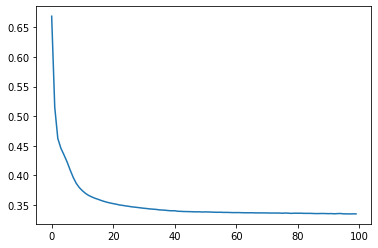

In [49]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))

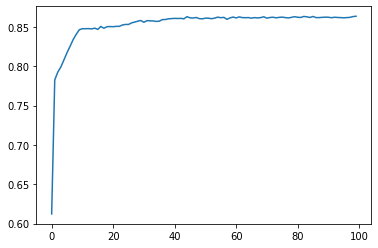

In [50]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))

### 模型準確度

In [57]:
predicted_y = (model(test_x).numpy() > 0.5).flatten().astype(int)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predicted_y)

0.8696666666666667

### 請繪製ROC Curve, 並求出 AUC

In [59]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(test_y, model(test_x).numpy())

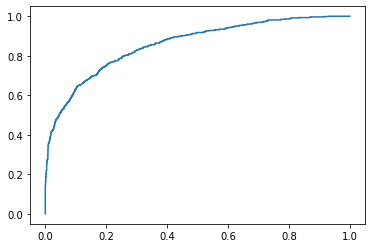

In [60]:
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)

In [62]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8579624705161935

### 比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_x, train_y)

clf2 = SVC(probability = True)
clf2.fit(train_x, train_y)

clf3 = LogisticRegression()
clf3.fit(train_x, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_x, train_y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_x, train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

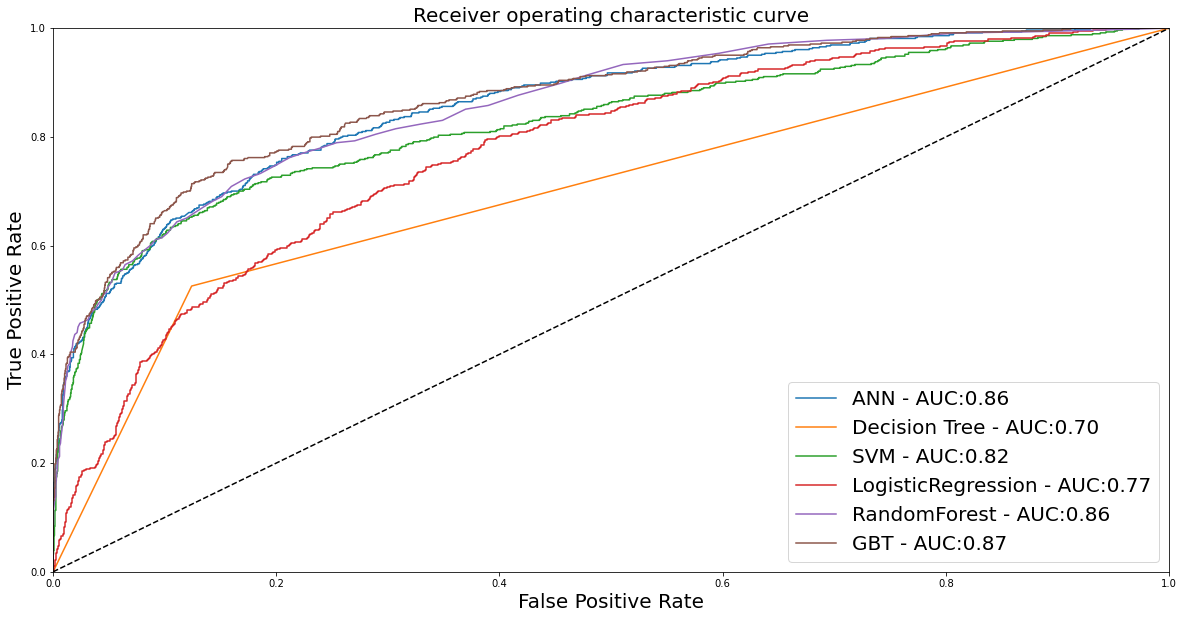

In [64]:
plt.figure(figsize= [20,10])

for clf, title in zip([model,clf1,clf2,clf3,clf4,clf5], 
             ['ANN','Decision Tree','SVM','LogisticRegression','RandomForest','GBT']):
  if title != 'ANN':
    probas_ = clf.predict_proba(test_x)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
  else:
    y_pred = clf(test_x).numpy()
    fpr, tpr, thresholds = roc_curve(test_y, y_pred)
  plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic curve', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

In [66]:
?model.compile

In [70]:
dir(tf.keras.optimizers)

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'get',
 'schedules',
 'serialize']

## 使用CNN 建立MNIST 識別網路

In [2]:
! nvidia-smi

Sat Aug  1 03:25:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

In [4]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

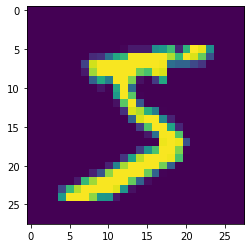

In [7]:
from matplotlib import pyplot as plt 
plt.imshow(train_images[0])

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [10]:
train_images.shape

(60000, 28, 28, 1)

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model = Sequential()
# 1. Convolution
model.add(Conv2D(filters=16, 
        kernel_size=(3, 3), 
        padding = 'same', 
        input_shape = (28, 28, 1), 
        activation = 'relu'))

# 2. Max Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# 3. Flattening
model.add(Flatten())


# 4. Fully Connected Network (FCN)
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 402,986
Trainable params: 402,986
Non-trainable params: 0
_________________________________________________________________


## Loss
SparseCategoricalCrossentropy: y =0,1,2,3,4...9

categorical_crossentropy: y = [[1,0,0,0,0..0],[0,1,...0],[0,0,1,...0]]

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer = 'adam', 
         loss = loss_fn, 
         metrics = ['accuracy'])

In [18]:
#print(dir(tf.keras.optimizers))
#print(dir(tf.keras.losses))

In [19]:
history = model.fit(train_images, train_labels,
            batch_size=100,
            epochs=15,
            verbose=1,
          validation_data=(test_images, test_labels))

Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4784 - accuracy: 0.9848 - val_loss: 1.4797 - val_accuracy: 0.9833
Epoch 2/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4751 - accuracy: 0.9877 - val_loss: 1.4796 - val_accuracy: 0.9824
Epoch 3/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4733 - accuracy: 0.9893 - val_loss: 1.4800 - val_accuracy: 0.9819
Epoch 4/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4715 - accuracy: 0.9907 - val_loss: 1.4790 - val_accuracy: 0.9834
Epoch 5/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4698 - accuracy: 0.9923 - val_loss: 1.4775 - val_accuracy: 0.9840
Epoch 6/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4690 - accuracy: 0.9931 - val_loss: 1.4777 - val_accuracy: 0.9841
Epoch 7/15
600/600 [==============================] - 2s 3ms/step - loss: 1.4684 - accuracy: 0.9934 - val_loss: 1.4763 - val_accuracy: 0.9859
Epoch 

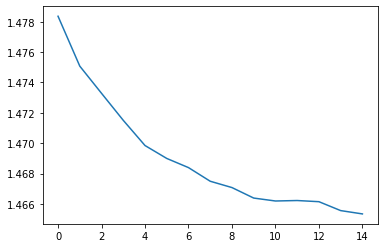

In [20]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))

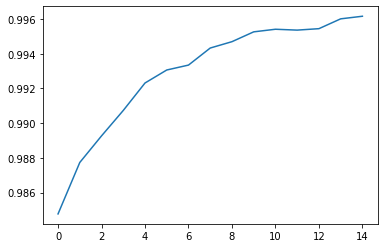

In [21]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))

In [22]:
! wget https://raw.githubusercontent.com/ywchiu/tibamedl/master/data/7.png

--2020-08-01 03:32:50--  https://raw.githubusercontent.com/ywchiu/tibamedl/master/data/7.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 393 [image/png]
Saving to: ‘7.png’

7.png               100%[===================>]     393  --.-KB/s    in 0s      

2020-08-01 03:32:50 (26.6 MB/s) - ‘7.png’ saved [393/393]



In [28]:
from PIL import Image
img = Image.open('7.png').convert('L')

In [29]:
import numpy as np
im = np.array(img)
im.shape

(28, 28)

In [31]:
im = 255 - im

In [33]:
im = im / 255.0

In [35]:
im.shape

(28, 28)

In [37]:
im = im.reshape((28,28,1))

In [38]:
im.shape

(28, 28, 1)

In [41]:
im = np.expand_dims(im, 0)

In [42]:
im.shape

(1, 28, 28, 1)

In [43]:
#(picnum, w, h, channel)
#(1, 28, 28, 1)

In [44]:
model.predict(im)

array([[1.6320417e-19, 1.4631481e-19, 4.0763138e-23, 2.0352089e-14,
        2.4928876e-13, 5.0275960e-20, 2.1309094e-17, 1.0000000e+00,
        3.8459006e-15, 7.2217716e-15]], dtype=float32)

In [45]:
np.argmax(model.predict(im))

7

## [實例] 利用卷積神經網路辨識圖片

### 寫爬蟲抓取明星圖片

In [46]:
import requests
res = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png/220px-Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png')

In [47]:
with open('zhiyu_test.png' ,'wb') as f:
  f.write(res.content)

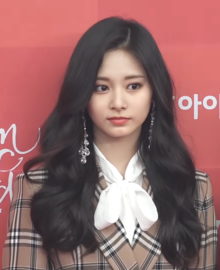

In [48]:
from PIL import Image
Image.open('zhiyu_test.png')

In [53]:
! pip install google_images_download

     |████████████████████████████████| 911kB 6.5MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=85a79820403af62f3f6e46917f97cc854b7ecdec81da1e0d57dafd9da7dcfa22
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [57]:
import requests
res = requests.get('https://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord=%E5%91%A8%E5%AD%90%E7%91%9C&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=-1&z=&ic=0&hd=&latest=&copyright=&word=%E5%91%A8%E5%AD%90%E7%91%9C&s=&se=&tab=&width=&height=&face=0&istype=2&qc=&nc=1&fr=&expermode=&force=&pn=120&rn=30&gsm=78&1596254720074=')
jd = res.json()

In [59]:
for img in jd['data']:
  print(img.get('middleURL'))

https://ss1.bdstatic.com/70cFvXSh_Q1YnxGkpoWK1HF6hhy/it/u=1567820363,3385104630&fm=26&gp=0.jpg
https://ss0.bdstatic.com/70cFuHSh_Q1YnxGkpoWK1HF6hhy/it/u=3411140151,4185830543&fm=26&gp=0.jpg
https://ss2.bdstatic.com/70cFvnSh_Q1YnxGkpoWK1HF6hhy/it/u=3787406153,806792539&fm=26&gp=0.jpg
https://ss3.bdstatic.com/70cFv8Sh_Q1YnxGkpoWK1HF6hhy/it/u=2613854485,1060304972&fm=26&gp=0.jpg
https://ss1.bdstatic.com/70cFvXSh_Q1YnxGkpoWK1HF6hhy/it/u=3099081977,3023464014&fm=26&gp=0.jpg
https://ss1.bdstatic.com/70cFvXSh_Q1YnxGkpoWK1HF6hhy/it/u=1172841971,508307288&fm=26&gp=0.jpg
https://ss1.bdstatic.com/70cFuXSh_Q1YnxGkpoWK1HF6hhy/it/u=1301190389,1676481024&fm=26&gp=0.jpg
https://ss0.bdstatic.com/70cFuHSh_Q1YnxGkpoWK1HF6hhy/it/u=3179388575,3459569493&fm=26&gp=0.jpg
https://ss3.bdstatic.com/70cFv8Sh_Q1YnxGkpoWK1HF6hhy/it/u=1168466272,523798649&fm=26&gp=0.jpg
https://ss2.bdstatic.com/70cFvnSh_Q1YnxGkpoWK1HF6hhy/it/u=233302922,623571486&fm=26&gp=0.jpg
https://ss2.bdstatic.com/70cFvnSh_Q1YnxGkpoWK1HF6hhy/it

In [75]:
def getPicture(path, url):
  res = requests.get(url)
  with open('{}/{}.jpg'.format(path, url.split('u=')[1].split('&')[0]) , 'wb') as f:
    f.write(res.content)

In [85]:
baidu_url = 'https://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord={}&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=-1&z=&ic=0&hd=&latest=&copyright=&word={}&s=&se=&tab=&width=&height=&face=0&istype=2&qc=&nc=1&fr=&expermode=&force=&pn={}&rn=30&gsm=78&1596254720074='
def getIdolImage(path, term, pagenum):
  if not os.path.exists(path):
    os.mkdir(path)
  for p in range(pagenum):
    res = requests.get(baidu_url.format(term, term, pagenum * 30))
    jd = res.json()
    for img in jd['data']:
      if img.get('middleURL'):
        getPicture(path, img.get('middleURL'))

In [80]:
getIdolImage('zhiyu/', '周子瑜' , 5)

In [81]:
! ls zhiyu | wc -l 

60


In [83]:
#! zip -r zhiyu zhiyu/*

In [86]:
getIdolImage('ning/', '张钧甯' , 3)

In [87]:
! ls ning | wc -l 

42


In [90]:
! zip -r ning ning/*

  adding: ning/1065940236,2351591012.jpg (deflated 0%)
  adding: ning/117487481,2001023976.jpg (deflated 0%)
  adding: ning/1239906645,868325344.jpg (deflated 1%)
  adding: ning/1493146964,2499526578.jpg (deflated 0%)
  adding: ning/152228759,3566698306.jpg (deflated 1%)
  adding: ning/1573792175,2613165350.jpg (deflated 0%)
  adding: ning/1646717786,1639568989.jpg (deflated 0%)
  adding: ning/172371035,3960180157.jpg (deflated 0%)
  adding: ning/1734073644,3223955364.jpg (deflated 0%)
  adding: ning/1842543233,2727112240.jpg (deflated 0%)
  adding: ning/1937391276,937684927.jpg (deflated 1%)
  adding: ning/197619559,1490231874.jpg (deflated 0%)
  adding: ning/1999564752,1903942571.jpg (deflated 0%)
  adding: ning/2041533341,2193964909.jpg (deflated 1%)
  adding: ning/2046783697,3406947282.jpg (deflated 0%)
  adding: ning/2061875557,3123840972.jpg (deflated 0%)
  adding: ning/2120474464,4004767592.jpg (deflated 1%)
  adding: ning/2168206564,2859682620.jpg (deflated 0%)
  adding: ning/2

In [92]:
getIdolImage('gem/', '邓紫棋' , 5)

In [89]:
! ls gem | wc -l 

30


In [91]:
! zip -r gem gem/*

  adding: gem/1074790825,3831576924.jpg (deflated 1%)
  adding: gem/1132653501,460162930.jpg (deflated 10%)
  adding: gem/1449541942,4162565655.jpg (deflated 1%)
  adding: gem/1452570317,2896188268.jpg (deflated 1%)
  adding: gem/1553225710,839417953.jpg (deflated 1%)
  adding: gem/16594607,2187333941.jpg (deflated 2%)
  adding: gem/1664999240,2187919217.jpg (deflated 2%)
  adding: gem/1741176069,1051871524.jpg (deflated 1%)
  adding: gem/17458926,2876790909.jpg (deflated 1%)
  adding: gem/1892754062,3320541358.jpg (deflated 1%)
  adding: gem/2026922150,4291128020.jpg (deflated 1%)
  adding: gem/2224578055,3035195458.jpg (deflated 0%)
  adding: gem/2335261809,330657283.jpg (deflated 1%)
  adding: gem/2347208693,2920585813.jpg (deflated 1%)
  adding: gem/2374124418,4276775839.jpg (deflated 1%)
  adding: gem/2474034278,3647391850.jpg (deflated 0%)
  adding: gem/2486844804,259761539.jpg (deflated 0%)
  adding: gem/2487592806,3345569403.jpg (deflated 1%)
  adding: gem/2646048027,3924449655

### 使用opencv擷取臉部資訊

In [1]:
import cv2 as cv

In [2]:
import requests
res = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png/220px-Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png')

In [3]:
with open('zhiyu_test.png' ,'wb') as f:
  f.write(res.content)

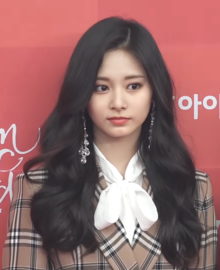

In [14]:
from PIL import Image
img = Image.open('zhiyu_test.png')
img

In [7]:
! wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2020-08-01 05:49:27--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.1s    

2020-08-01 05:49:27 (7.49 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [15]:
im = cv.imread('zhiyu_test.png')
im.shape

(270, 220, 3)

In [17]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(im, 1.3, 5)
faces

array([[82, 60, 76, 76]], dtype=int32)

In [18]:
x,y,w,h = faces[0]

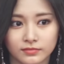

In [19]:
box     = (x, y, x+w, y+h)
crpim   = img.crop(box).resize((64,64))
crpim

In [20]:
! unzip ning.zip > ning.log

In [21]:
! unzip gem.zip > gem.log

In [22]:
! unzip zhiyu.zip > zhiyu.log

In [28]:
import os
def cropIdolFace(src, dest):
    if not os.path.exists(dest):
        os.mkdir(dest)
    for filename in os.listdir(src):
        img = cv.imread(src + filename)
        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        if len(faces) == 1:
          try:
            im      = Image.open(src + filename)
            x,y,w,h = faces[0]
            box     = (x, y, x+w, y+h)
            crpim   = im.crop(box).resize((64,64))
            crpim.save(dest + filename)
          except:
            pass

In [26]:
cropIdolFace('zhiyu/', 'zhiyu_face/')

In [29]:
cropIdolFace('ning/', 'ning_face/')

In [30]:
cropIdolFace('gem/', 'gem_face/')

In [ ]:
! zip -r zhiyu_face zhiyu_face/*
! zip -r ning_face ning_face/*
! zip -r gem_face gem_face/*

In [ ]:
! unzip faceset.zip

### 使用 CNN 建立人臉識別模型

In [33]:
% tensorflow_version 2.x

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(filters=32, 
           kernel_size=(3, 3),                                    padding = 'same',
           input_shape = (64, 64, 3),
           activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(filters=32, 
          kernel_size=(3, 3), 
          padding = 'same', 
          activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 3, activation = 'softmax'))

In [66]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [67]:
classifier.compile(optimizer = 'adam', 
          loss ='categorical_crossentropy', 
          metrics = ['accuracy'])

### 圖像增廣技術

In [68]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
           rescale = 1./255,
           shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
           zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
           horizontal_flip = True #水平翻转操作
         )

In [69]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [47]:
import os
if not os.path.exists('train/'):
    os.mkdir('train/')
if not os.path.exists('test/'):
    os.mkdir('test/')

In [50]:
! rm -rf zhiyu_face ning_face gem_face

In [ ]:
! unzip faceset.zip

In [53]:
! mv faceset/gem_face ./
! mv faceset/ning_face ./
! mv faceset/zhiyu_face ./

In [70]:
import os
from sklearn.model_selection import train_test_split

def splitDataset(dirs):
    dataset = list(os.listdir(dirs))
    train_data, test_data = train_test_split(dataset, test_size= 0.33, random_state = 42)
    
    if not os.path.exists('train/'+dirs):
        os.mkdir('train/'+dirs)
    if not os.path.exists('test/'+dirs):
        os.mkdir('test/'+dirs)

    for f in train_data:
        os.rename(dirs + f, 'train/'+ dirs + f)
    for f in test_data:
        os.rename(dirs + f, 'test/' + dirs +f)

In [55]:
splitDataset('zhiyu_face/')

In [56]:
splitDataset('ning_face/')

In [57]:
splitDataset('gem_face/')

In [71]:
training_set = train_datagen.flow_from_directory(
    'train/', target_size = (64, 64),
     batch_size = 16,
     class_mode = 'categorical')

Found 55 images belonging to 3 classes.


In [72]:
test_set = test_datagen.flow_from_directory(
    'test/', target_size = (64, 64),
    batch_size = 16, 
    class_mode = 'categorical')

Found 28 images belonging to 3 classes.


In [ ]:
history = classifier.fit_generator(training_set,
                  epochs=100,
                  verbose = 1,
                  validation_data = test_set)

### 驗證模型

In [75]:
import requests
res = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png/220px-Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png')

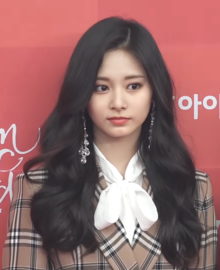

In [76]:
from PIL import Image
img = Image.open('zhiyu_test.png')
img

In [77]:
im = cv.imread('zhiyu_test.png')
im.shape

(270, 220, 3)

In [78]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(im, 1.3, 5)
faces

array([[82, 60, 76, 76]], dtype=int32)

In [79]:
x,y,w,h = faces[0]

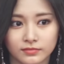

In [80]:
box     = (x, y, x+w, y+h)
crpim   = img.crop(box).resize((64,64))
crpim

In [83]:
crpim.save('predict_face.png')

In [84]:

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('predict_face.png', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [85]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 64, 64, 3)

In [87]:
classifier.predict_classes(test_image)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([2])

In [88]:
training_set.class_indices

{'gem_face': 0, 'ning_face': 1, 'zhiyu_face': 2}